In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [3]:
#Importing the dataset
data = pd.read_csv(r"D:\WFH\linear-regression-example-master\data\Advertising_data.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


# Simple Linear Regression

Here we will estimate the sales withh respect to the advertisement on Television. 

In [4]:
#Initializing the variables
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

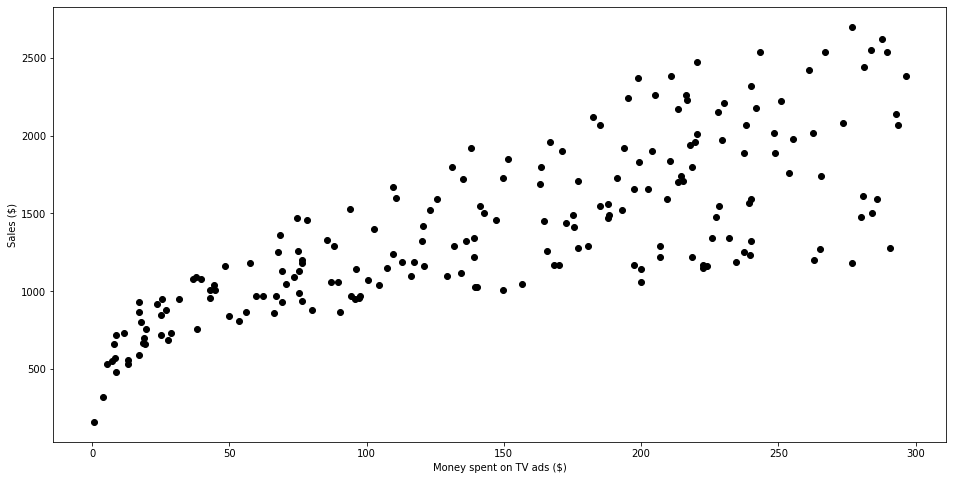

In [5]:
## Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [6]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

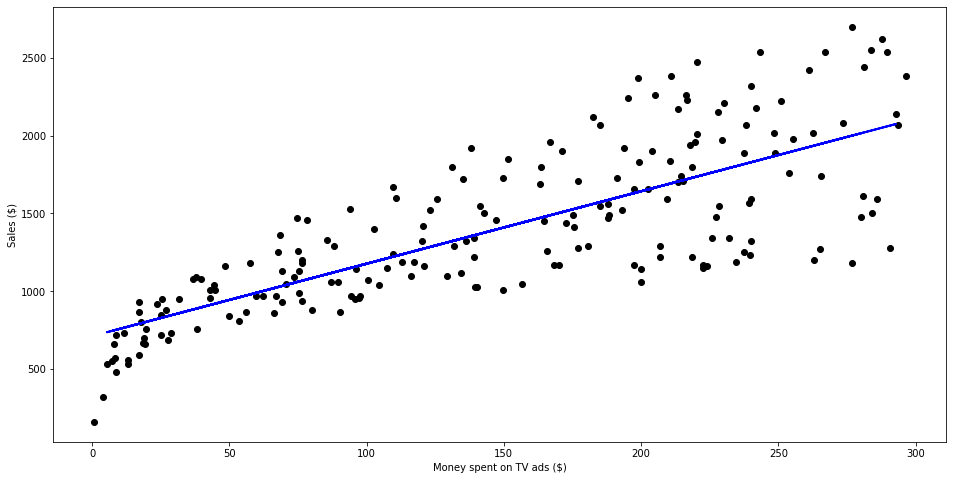

In [8]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)") 
plt.show()

In [9]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [10]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

In [11]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [12]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Linear Regression

In [13]:
#Initializing the variables
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [14]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [17]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [18]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [19]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

In [22]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))
 
#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 875
Radio : 45
Newspaper : 400
you will get Rs5173.56 sales by advertising Rs875.0 on TV, Rs45.0 on Radio and Rs400.0 on newspaper.


In [24]:
# #Saving the model
# if not os.path.exists('models'):
#     os.makedirs('models')
    
# MODEL_PATH = "models/multiple_reg.sav"
# pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))